## Observations and Insights 

In [505]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
mouse_data.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [484]:
# Checking the number of mice.
mouse_data['Mouse ID'].count()

1893

In [485]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data.duplicated(subset = ['Mouse ID','Timepoint']).sum()

5

In [486]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data.loc[mouse_data[['Mouse ID','Timepoint']].duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [487]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_data = mouse_data.drop_duplicates(keep = "first", subset = ['Mouse ID', 'Timepoint'])

In [488]:
# Checking the number of mice in the clean DataFrame.
new_mouse_data['Mouse ID'].count()

1888

## Summary Statistics

In [489]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_Statistics_TV = pd.DataFrame({'Mean':new_mouse_data['Tumor Volume (mm3)'].mean(),
             'Median':new_mouse_data['Tumor Volume (mm3)'].median(),
             'Standard Deviation':new_mouse_data['Tumor Volume (mm3)'].std(),
             'SEM (Standard Error of Mean)':new_mouse_data['Tumor Volume (mm3)'].sem(),}, index = [0])

Summary_Statistics_TV

,Mean,Median,Standard Deviation,SEM (Standard Error of Mean)
0,50.449276,48.951421,8.904565,0.204933


In [490]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen
# This method produces everything in a single groupby function
Drug_Regimen_Groupby = new_mouse_data.groupby("Drug Regimen")

mean = Drug_Regimen_Groupby['Tumor Volume (mm3)'].mean()
median = Drug_Regimen_Groupby['Tumor Volume (mm3)'].median()
std_dev = Drug_Regimen_Groupby['Tumor Volume (mm3)'].std()
std_err_m = Drug_Regimen_Groupby['Tumor Volume (mm3)'].sem()

Summary_Statistics_TV_Groupby = pd.DataFrame({'Mean': mean, 
                                              'Median': median, 
                                              'Standard Deviation': std_dev, 
                                              'SEM (Standard Error of Mean)':std_err_m})

Summary_Statistics_TV_Groupby

,Mean,Median,Standard Deviation,SEM (Standard Error of Mean)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

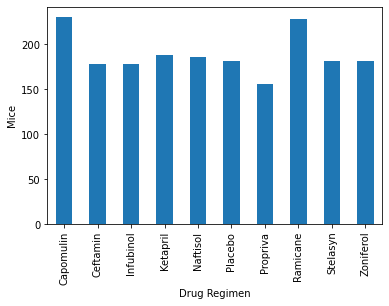

In [491]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
new_mouse_data_groupby = new_mouse_data.groupby('Drug Regimen').count()['Mouse ID']
new_mouse_data_groupby.plot(kind = 'bar')
plt.ylabel('Mice')
plt.show()

<BarContainer object of 10 artists>

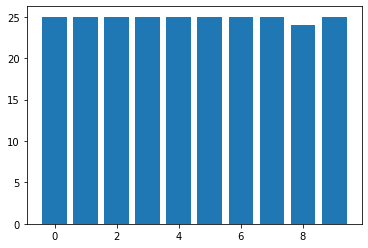

In [492]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
new_mouse_data['Drug Regimen'].unique()
x = np.arange(0, len(new_mouse_data['Drug Regimen'].unique()))
groupby = new_mouse_data.groupby('Drug Regimen')['Mouse ID']
y = groupby.nunique()
plt.bar(x, y)


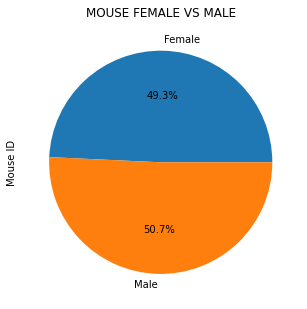

In [493]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
new_mouse_data_groupby = new_mouse_data.groupby('Sex').count()['Mouse ID']
new_mouse_data_groupby.plot(kind = 'pie', figsize = (5,20), title = "MOUSE FEMALE VS MALE", autopct = '%1.1f%%')
plt.show()

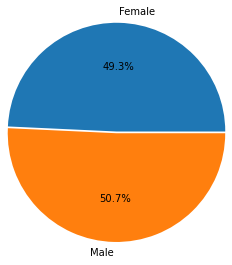

In [494]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.01, 0.01)
plt.pie(new_mouse_data_groupby, labels = ["Female", 'Male'], explode = explode, autopct = '%1.1f%%', radius = 1.25)
plt.show()

## Quartiles, Outliers and Boxplots

In [495]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumorMax = new_mouse_data.groupby('Mouse ID')['Timepoint'].max().reset_index()\
.merge(new_mouse_data,on=['Mouse ID','Timepoint'],how='left')
tumorMax.head()

Capomulin = tumorMax.loc[tumorMax['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
Ramicane = tumorMax.loc[tumorMax['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
Infubinol = tumorMax.loc[tumorMax['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
Ceftamin = tumorMax.loc[tumorMax['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

In [507]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

Capomulin_Quartile = Capomulin.quantile([0.25,0.5,0.75])
Cap_lowerq = Capomulin_Quartile[0.25]
Cap_higherq = Capomulin_Quartile[0.75]
Cap_IQR = Cap_higherq - Cap_lowerq
Cap_lowerbound = Cap_lowerq - (1.5 * cap_IQR)
Cap_higherbound = Cap_higherq + (1.5 * cap_IQR)
print(f"Capomulin potential outliers: {Capomulin.loc[(Capomulin < Cap_lowerbound)]}")

Ramicane_Quartile = Ramicane.quantile([0.25,0.5,0.75])
Ram_lowerq = Ramicane_Quartile[0.25]
Ram_higherq = Ramicane_Quartile[0.75]
Ram_IQR = Ram_higherq - Ram_lowerq
Ram_lowerbound = Ram_lowerq - (1.5 * Ram_IQR)
Ram_higherbound = Ram_higherq + (1.5 * Ram_IQR)
print(f"Ramicane potential outliers: {Ramicane.loc[(Ramicane < Ram_lowerbound)]}")

Infubinol_Quartile = Infubinol.quantile([0.25,0.5,0.75])
Inf_lowerq = Infubinol_Quartile[0.25]
Inf_higherq = Infubinol_Quartile[0.75]
Inf_IQR = Inf_higherq - Inf_lowerq
Inf_lowerbound = Inf_lowerq - (1.5 * Inf_IQR)
Inf_higherbound = Inf_higherq + (1.5 * Inf_IQR)
print(f"Infubinol potential outliers: {Infubinol.loc[(Infubinol < Inf_lowerbound)]}")

Ceftamin_Quartile = Ceftamin.quantile([0.25,0.5,0.75])
Cef_lowerq = Ceftamin_Quartile[0.25]
Cef_higherq = Ceftamin_Quartile[0.75]
Cef_IQR = Cef_higherq - Cef_lowerq
Cef_lowerbound = Cef_lowerq - (1.5 * Cef_IQR)
Cef_higherbound = Cef_higherq + (1.5 * Cef_IQR)
print(f"Ceftamin potential outliers: {Ceftamin.loc[(Ceftamin < Cef_lowerbound)]}")
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


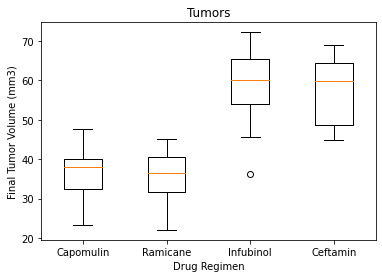

In [508]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_list = [Capomulin, Ramicane, Infubinol, Ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.boxplot(treatment_list, labels = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

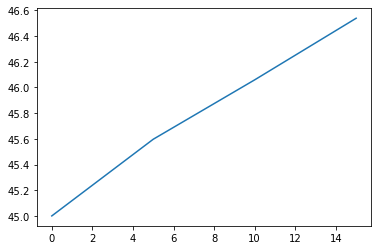

In [502]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df = new_mouse_data[['Timepoint','Tumor Volume (mm3)', 'Drug Regimen','Mouse ID']]
Capomulin_data = df.loc[df['Drug Regimen'] == 'Capomulin',:]
r157_data = Capomulin_data.loc[Capomulin_data['Mouse ID'] == 'r157',:]
plt.plot(r157_data['Timepoint'], r157_data['Tumor Volume (mm3)'])
plt.show()


AttributeError: 'PathCollection' object has no attribute 'scatter'

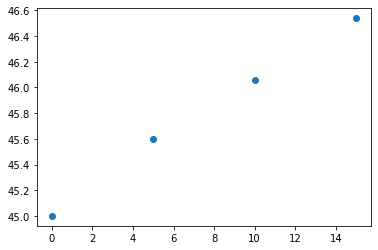

In [510]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(r157_data['Timepoint'], r157_data['Tumor Volume (mm3)'])

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
